In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Flattenatten, Dense

In [3]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 23s 5us/step


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

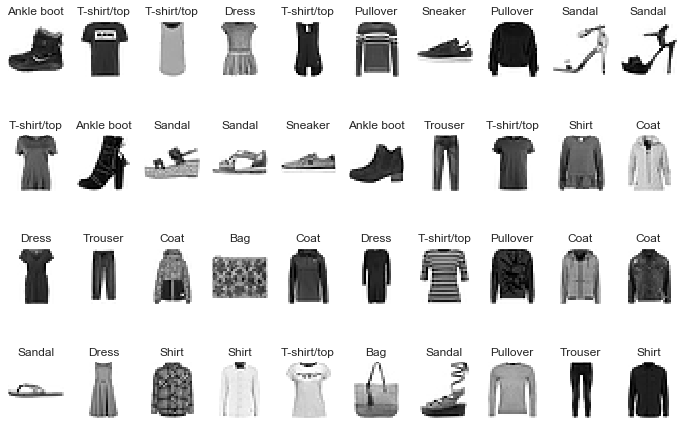

In [8]:
fig, axes = plt.subplots(4,10, subplot_kw = {'xticks':[], 'yticks':[]}, figsize = (12,8))
for i, ax in enumerate(axes.flat):
    img = X_train[i]
    ax.imshow(img, cmap = 'binary')
    ax.set_title(class_names[y_train[i]])

Create a validation set and normalize: 

In [10]:
X_train, X_valid = X_train[5000:] / 250.0, X_train[:5000] / 250.0
y_train, y_valid = y_train[5000:], y_train[:5000]

In [13]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(300, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

<p class = 'note'>Summary: <code>model.summary()</code></p>

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


<span class = 'note'>Accessing layers:</span>

In [16]:
model.layers

Accessing the $1^{th}$ layer:

In [21]:
model.layers[1].name

'dense_1'

In [22]:
model.get_layer('dense_1').name

'dense_1'

<span class = 'note'>Accessing parameters of a layer</span>: <code>layer.get_weights()</code>, <code>layer.set_weights</code>

In [25]:
weights, bias = model.layers[1].get_weights()
(weights, bias)

(array([[-0.02569865,  0.05061233, -0.06582257, ...,  0.00753827,
         -0.07132196,  0.0394649 ],
        [-0.05455979,  0.01142406, -0.06412174, ..., -0.04684324,
          0.01373873, -0.05198498],
        [-0.06434312,  0.00607312,  0.01144597, ..., -0.02505193,
         -0.00737423, -0.00625651],
        ...,
        [ 0.07101864, -0.05687661, -0.02971516, ..., -0.04701255,
         -0.02443425,  0.02400444],
        [-0.02934994, -0.03966741,  0.03537916, ...,  0.05634269,
         -0.02198635,  0.00107539],
        [ 0.06990395,  0.04405352, -0.00909787, ..., -0.02412325,
         -0.03614224, -0.06178861]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [27]:
weights.shape, bias.shape

((784, 300), (300,))

<span class = 'note'>Compile:</span>

In [31]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 130us/step - loss: 0.1559 - accuracy: 0.9398 - val_loss: 0.3416 - val_accuracy: 0.8992
Epoch 2/10
55000/55000 [==============================] - 7s 128us/step - loss: 0.1541 - accuracy: 0.9409 - val_loss: 0.3671 - val_accuracy: 0.8984
Epoch 3/10
55000/55000 [==============================] - 7s 126us/step - loss: 0.1502 - accuracy: 0.9434 - val_loss: 0.3571 - val_accuracy: 0.8996
Epoch 4/10
55000/55000 [==============================] - 7s 128us/step - loss: 0.1464 - accuracy: 0.9439 - val_loss: 0.4035 - val_accuracy: 0.8978
Epoch 5/10
55000/55000 [==============================] - 7s 127us/step - loss: 0.1436 - accuracy: 0.9450 - val_loss: 0.3900 - val_accuracy: 0.8974
Epoch 6/10
55000/55000 [==============================] - 7s 131us/step - loss: 0.1399 - accuracy: 0.9455 - val_loss: 0.3911 - val_accuracy: 0.9018
Epoch 7/10
55000/55000 [==============================] - 7s 12

Instead of passing a validation set using the <code>validation_data</code>
argument, you could instead set <code>validation_split</code> to the ratio of
the training set that you want Keras to use for validation (e.g., 0.1).

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the class_weight argument when
calling the <code>fit()</code> method, giving a larger weight to underrepresented classes, and a
lower weight to overrepresented classes via <code>class_weights</code>. These weights would be used by Keras when
computing the loss. If you need per-instance weights instead, you can set the <code>sample_weight</code> argument (it supersedes class_weight). This could be useful for exam‐
ple if some instances were labeled by experts while others were labeled using a
crowdsourcing platform: you might want to give more weight to the former. You can
also provide sample weights (but not class weights) for the validation set by adding
them as a third item in the validation_data tuple

## History Object

The <code>fit()</code> function return a <i>History Object</i>:

### Training parameters: <code>history.params</code>

In [44]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': None,
 'samples': 55000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

### List of epochs: <code>history.epoch</code>

In [45]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### History: <code>history.history</code>

In [46]:
his = history.history
his

{'val_loss': [0.34160061304736883,
  0.36714490624442697,
  0.35711035861074925,
  0.4035276462495327,
  0.38998866111040115,
  0.39112821951918303,
  0.3728327217966318,
  0.4054881627008319,
  0.37164395840913056,
  0.4271891325108707],
 'val_accuracy': [0.8992000222206116,
  0.8984000086784363,
  0.8996000289916992,
  0.8978000283241272,
  0.8974000215530396,
  0.9017999768257141,
  0.902400016784668,
  0.9020000100135803,
  0.9002000093460083,
  0.9002000093460083],
 'loss': [0.15587034335082228,
  0.15405424472161314,
  0.15021022457480432,
  0.1463829749952663,
  0.14355610557713291,
  0.1399140280772339,
  0.1348003952923146,
  0.13209827864441004,
  0.1306779365429824,
  0.1297549643977122],
 'accuracy': [0.9398,
  0.9408727,
  0.9434364,
  0.94387275,
  0.9450182,
  0.9454909,
  0.94798183,
  0.949,
  0.94969094,
  0.95067275]}

In [47]:
df = pd.DataFrame(his)
df

,val_loss,val_accuracy,loss,accuracy
0,0.341601,0.8992,0.155870,0.939800
1,0.367145,0.8984,0.154054,0.940873
2,0.357110,0.8996,0.150210,0.943436
3,0.403528,0.8978,0.146383,0.943873
4,0.389989,0.8974,0.143556,0.945018
5,0.391128,0.9018,0.139914,0.945491
6,0.372833,0.9024,0.134800,0.947982
7,0.405488,0.9020,0.132098,0.949000
8,0.371644,0.9002,0.130678,0.949691
9,0.427189,0.9002,0.129755,0.950673


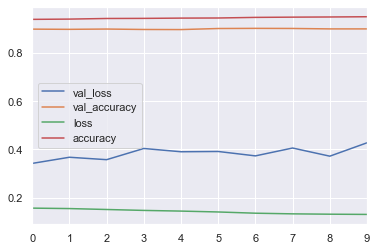

In [48]:
df.plot()

## Evaluation

In [50]:
model.evaluate(X_test, y_test)
#return (loss, accuracy)

10000/10000 [==============================] - 0s 26us/step


[99.14747347488404, 0.8658999800682068]

## Prediction

Prediction with probability:

In [51]:
model.predict(X_test[:3])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Predict class:

In [52]:
model.predict_classes(X_test[:3])

array([9, 2, 1], dtype=int64)

# Regression MLP

In [2]:
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 6)

In [6]:
model = Sequential([
    Dense(30, activation = 'relu'),
    Dense(1)
])
model.compile(optimizer = 'rmsprop', loss = 'mse')


In [7]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 20)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 246us/step - loss: 482.9987 - val_loss: 11.3775
Epoch 2/20
11610/11610 [==============================] - 0s 26us/step - loss: 59.8650 - val_loss: 66.6316
Epoch 3/20
11610/11610 [==============================] - 0s 25us/step - loss: 57.0580 - val_loss: 171.6631
Epoch 4/20
11610/11610 [==============================] - 0s 25us/step - loss: 74.9410 - val_loss: 97.7466
Epoch 5/20
11610/11610 [==============================] - 0s 31us/step - loss: 55.0564 - val_loss: 2.2686
Epoch 6/20
11610/11610 [==============================] - 0s 31us/step - loss: 68.8905 - val_loss: 18.7980
Epoch 7/20
11610/11610 [==============================] - 0s 28us/step - loss: 52.1304 - val_loss: 32.0696
Epoch 8/20
11610/11610 [==============================] - 0s 25us/step - loss: 52.3867 - val_loss: 1.6674
Epoch 9/20
11610/11610 [==============================] - 0s 26us/step - loss: 52.3122 - val_l

In [8]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 13us/step


30.825690868288973

# Building complex models

<img src = 'wideanddeep.png'>

In [13]:
from keras.layers import Concatenate, Input
from keras.models import Model
X_train.shape

(11610, 8)

In [17]:
input = Input(shape=(8,))
hidden1 = Dense(30, activation='relu')(input)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input, hidden2])
output = Dense(1)(concat)

model = Model(inputs = [input], outputs = [output])

But what if you want to send a subset of the features through the wide path, and a
different subset (possibly overlapping) through the deep path (see Figure 10-14)? In
this case, one solution is to use multiple inputs. For example, suppose we want to
send 5 features through the deep path (features 0 to 4), and 6 features through the
wide path (features 2 to 7):

<img src = 'cali.png'>

In [18]:
input_A = Input(shape = (5,))
input_B = Input(shape = (6,))
hidden1 = Dense(30, activation = 'relu')(input_B)
hidden2 = Dense(10, activation = 'relu')(hidden1)
concat = Concatenate()([input_A, hidden2])
ouput = Dense(1)(concat)
model = Model(inputs = [input_A, input_B], outputs = [ouput])

In [22]:
model.compile(optimizer='rmsprop', loss = 'mse')
X_train_new = [X_train[:,:5], X_train[:, 2:]]
X_valid_new = [X_valid[:,:5], X_valid[:,2:]]
model.fit(X_train_new, y_train, validation_data= (X_valid_new, y_valid), epochs = 15)

Train on 11610 samples, validate on 3870 samples
Epoch 1/15
11610/11610 [==============================] - 1s 75us/step - loss: 9456.8365 - val_loss: 290.3773
Epoch 2/15
11610/11610 [==============================] - 0s 28us/step - loss: 47.8522 - val_loss: 13.2783
Epoch 3/15
11610/11610 [==============================] - 0s 29us/step - loss: 37.6293 - val_loss: 6.0192
Epoch 4/15
11610/11610 [==============================] - 0s 29us/step - loss: 34.5328 - val_loss: 4.4234
Epoch 5/15
11610/11610 [==============================] - 0s 33us/step - loss: 30.4128 - val_loss: 35.2407
Epoch 6/15
11610/11610 [==============================] - 0s 33us/step - loss: 28.0197 - val_loss: 1.7534
Epoch 7/15
11610/11610 [==============================] - 0s 31us/step - loss: 32.3908 - val_loss: 2.3072
Epoch 8/15
11610/11610 [==============================] - 0s 28us/step - loss: 27.6295 - val_loss: 2.1907
Epoch 9/15
11610/11610 [==============================] - 0s 29us/step - loss: 24.7856 - val_loss

In [23]:
X_test_new = [X_test[:, :5], X_test[:, 2:]]
model.evaluate(X_test_new, y_test)

5160/5160 [==============================] - 0s 15us/step


1.3842270030531771

In [24]:
model.predict(X_test_new)

array([[0.32354093],
       [0.74637717],
       [1.6174375 ],
       ...,
       [0.6243967 ],
       [2.0308983 ],
       [2.4300084 ]], dtype=float32)

## Multiple outputs

<img src = 'multipleoutput.png'>

In [29]:
input_A = Input(shape = (5,))
input_B = Input(shape = (6,))
hidden1 = Dense(30, activation='relu')(input_B)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_A, hidden2])
output = Dense(1)(concat)
aux = Dense(1)(hidden2)
model = Model(inputs = [input_A, input_B], outputs = [output, aux])

Each output will need its own loss function, so when we compile the model we
should pass a list of losses (if we pass a single loss, Keras will assume that the same
loss must be used for all outputs). By default, Keras will compute all these losses and
simply add them up to get the final loss used for training. However, we care much
more about the main output than about the auxiliary output (as it is just used for reg‐
ularization), so we want to give the main output’s loss a much greater weight. Fortu‐
nately, it is possible to set all the loss weights when compiling the model:

In [36]:
model.compile(loss = 'mse', loss_weights=[.9, .1], optimizer= 'sgd')

model.fit(X_train_new, [y_train, y_train], epochs = 20, validation_data= (X_valid_new, [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 37us/step - loss: nan - dense_17_loss: nan - dense_18_loss: nan - val_loss: nan - val_dense_17_loss: nan - val_dense_18_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 32us/step - loss: nan - dense_17_loss: nan - dense_18_loss: nan - val_loss: nan - val_dense_17_loss: nan - val_dense_18_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 31us/step - loss: nan - dense_17_loss: nan - dense_18_loss: nan - val_loss: nan - val_dense_17_loss: nan - val_dense_18_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 32us/step - loss: nan - dense_17_loss: nan - dense_18_loss: nan - val_loss: nan - val_dense_17_loss: nan - val_dense_18_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 31us/step - loss: nan - dense_17_loss: nan - dense_18_loss: nan - val_loss: nan - val_dense_17_loss: nan - val_dense_18_loss: 

In [35]:
model.layers[1].get_weights()

[array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, na

# Save and Restore

## Saving

In [37]:
model.save('my_model.h5')

## Loading

In [39]:
import keras
my_model = keras.models.load_model('my_model.h5')

## Using callback

### Checkpoint

<img src = 'callback.png'>

<code>ModelCheckpoint</code>: save the model after every epoch

In [58]:
from keras.callbacks import ModelCheckpoint
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 6)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [61]:
checkpoint = ModelCheckpoint('iris_model.h5', save_best_only=True)
model = Sequential([
    Dense(15, activation = 'relu', input_shape = (4,)),
    Dense(3, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [63]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 30, callbacks=[checkpoint])

Train on 84 samples, validate on 28 samples
Epoch 1/30
84/84 [==============================] - 0s 59us/step - loss: 0.7344 - accuracy: 0.7262 - val_loss: 0.6814 - val_accuracy: 0.8571
Epoch 2/30
84/84 [==============================] - 0s 59us/step - loss: 0.7228 - accuracy: 0.7262 - val_loss: 0.6689 - val_accuracy: 0.8571
Epoch 3/30
84/84 [==============================] - 0s 59us/step - loss: 0.7118 - accuracy: 0.7381 - val_loss: 0.6570 - val_accuracy: 0.8571
Epoch 4/30
84/84 [==============================] - 0s 71us/step - loss: 0.7006 - accuracy: 0.7500 - val_loss: 0.6459 - val_accuracy: 0.8571
Epoch 5/30
84/84 [==============================] - 0s 71us/step - loss: 0.6911 - accuracy: 0.7619 - val_loss: 0.6350 - val_accuracy: 0.8571
Epoch 6/30
84/84 [==============================] - 0s 47us/step - loss: 0.6808 - accuracy: 0.7857 - val_loss: 0.6248 - val_accuracy: 0.8571
Epoch 7/30
84/84 [==============================] - 0s 103us/step - loss: 0.6713 - accuracy: 0.7857 - val_loss

In [64]:
iris_model = keras.models.load_model('iris_model.h5') #roll back to the best model

In [65]:
iris_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 15)                75        
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 48        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [69]:
iris_model.layers[0].get_weights()

[array([[-0.08934874,  0.38745114,  0.40277112,  0.2372908 ,  0.41815597,
         -0.49217185,  0.06158461,  0.03046875,  0.3097117 , -0.07180721,
         -0.54211545,  0.59913695, -0.06765333, -0.39068955, -0.22628614],
        [ 0.4489913 ,  0.5769414 , -0.6278987 , -0.15419298, -0.07607377,
          0.49272776,  0.14024562,  0.04267786,  0.34417343, -0.19586828,
         -0.4353738 ,  0.2352206 ,  0.02731327,  0.05962317,  0.05053587],
        [-0.25967586,  0.04085253,  0.3756546 , -0.5693138 , -0.27280077,
         -0.39715877,  0.00363374, -0.34438756, -0.21955265, -0.4662081 ,
         -0.48411444, -0.11246449, -0.24012765,  0.27570513, -0.30326617],
        [-0.02964747, -0.23856936, -0.44467843, -0.25741377,  0.47703767,
          0.11917481,  0.67687285, -0.36216867, -0.00733115, -0.55946946,
         -0.6349757 , -0.2659748 ,  0.06249695, -0.46005473, -0.19486548]],
       dtype=float32),
 array([ 0.04090235, -0.09318069,  0.11662392, -0.03764937, -0.10250963,
         0.

### Early stopping

Another way to implement early stopping is to simply use the <code>EarlyStopping</code> callback. It will interrupt training when it measures no progress on the validation set for
a number of epochs (defined by the <code>patience</code> argument), and it will optionally roll
back to the best model. You can combine both callbacks to both save checkpoints of
your model (in case your computer crashes), and actually interrupt training early
when there is no more progress (to avoid wasting time and resources):

In [71]:
from keras.callbacks import EarlyStopping

In [73]:
early_cb = EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = ModelCheckpoint('iris_early.h5', save_best_only=True)

model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid), callbacks = [early_cb, checkpoint_cb])

Train on 84 samples, validate on 28 samples
Epoch 1/30
84/84 [==============================] - 0s 71us/step - loss: 0.5267 - accuracy: 0.8095 - val_loss: 0.4600 - val_accuracy: 0.8571
Epoch 2/30
84/84 [==============================] - 0s 71us/step - loss: 0.5227 - accuracy: 0.8095 - val_loss: 0.4556 - val_accuracy: 0.8571
Epoch 3/30
84/84 [==============================] - 0s 71us/step - loss: 0.5188 - accuracy: 0.8095 - val_loss: 0.4513 - val_accuracy: 0.8929
Epoch 4/30
84/84 [==============================] - 0s 95us/step - loss: 0.5149 - accuracy: 0.8095 - val_loss: 0.4471 - val_accuracy: 0.8929
Epoch 5/30
84/84 [==============================] - 0s 71us/step - loss: 0.5111 - accuracy: 0.8095 - val_loss: 0.4430 - val_accuracy: 0.8929
Epoch 6/30
84/84 [==============================] - 0s 59us/step - loss: 0.5075 - accuracy: 0.8095 - val_loss: 0.4389 - val_accuracy: 0.8929
Epoch 7/30
84/84 [==============================] - 0s 95us/step - loss: 0.5040 - accuracy: 0.8095 - val_loss:

<p class = 'highlight'>The number of epochs can be set to a large value since training will stop automatically when there is no more progress. Moreover, there is no need to restore the best
model saved in this case since the <code>EarlyStopping</code> callback will keep track of the best
weights and restore them for us at the end of training

# TensorBoard

In [85]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'
run_logdir

'.\\my_logs\\run_2019_11_13-18_03_33'

In [86]:
from keras.callbacks import TensorBoard
tensorboard_cb = TensorBoard(run_logdir)

In [87]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 20, callbacks = [tensorboard_cb])

Train on 84 samples, validate on 28 samples
Epoch 1/20
84/84 [==============================] - 1s 11ms/step - loss: 0.3914 - accuracy: 0.8571 - val_loss: 0.3127 - val_accuracy: 1.0000


C:\Users\dell\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.223345). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Epoch 2/20
84/84 [==============================] - 0s 131us/step - loss: 0.3895 - accuracy: 0.8571 - val_loss: 0.3104 - val_accuracy: 1.0000
Epoch 3/20
84/84 [==============================] - 0s 278us/step - loss: 0.3875 - accuracy: 0.8571 - val_loss: 0.3083 - val_accuracy: 1.0000
Epoch 4/20
84/84 [==============================] - 0s 279us/step - loss: 0.3857 - accuracy: 0.8571 - val_loss: 0.3062 - val_accuracy: 1.0000
Epoch 5/20
84/84 [==============================] - 0s 289us/step - loss: 0.3838 - accuracy: 0.8571 - val_loss: 0.3043 - val_accuracy: 1.0000
Epoch 6/20
84/84 [==============================] - 0s 185us/step - loss: 0.3819 - accuracy: 0.8571 - val_loss: 0.3023 - val_accuracy: 1.0000
Epoch 7/20
84/84 [==============================] - 0s 83us/step - loss: 0.3801 - accuracy: 0.8571 - val_loss: 0.3003 - val_accuracy: 1.0000
Epoch 8/20
84/84 [==============================] - 0s 91us/step - loss: 0.3783 - accuracy: 0.8571 - val_loss: 0.2985 - val_accuracy: 1.0000
Epoch 9/

# Fine-Tuning Neural Network parameters

## Number of Neurons per Hidden Layer

Start with a large number to overfit, then shrink until it does not overfit

## Learning Rate, Batch Size and Other Hyperparameters

<img src = 'tuning.png'>

The first step is to create a func‐
tion that will build and compile a Keras model, given a set of hyperparameters:


In [3]:
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import SGD

def build_model(n_hidden = 1, units = 30, learning_rate = .001, input_shape = (8,)):
    model = Sequential()
    for _ in range(n_hidden):
        option = {'input_shape' : input_shape} if _ else {}
        layer = Dense(units, activation = 'relu', **option)
        model.add(layer)
    model.add(Dense(1))
    model.compile(loss = 'mse', optimizer = SGD(learning_rate))
    return model

In [4]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_model)

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import reciprocal
param_dis = {
    'n_hidden' : [1,2,3,4],
    'units': np.arange(1,100),
    'learning_rate': reciprocal(3e-4, 3e-2)
}
grid = RandomizedSearchCV(model, param_dis, n_iter=10, cv = 5)
early_cb = EarlyStopping(patience=10)
grid.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks = [early_cb])

Train on 227 samples, validate on 95 samples
Epoch 1/100
227/227 [==============================] - 0s 301us/step - loss: 495.6952 - val_loss: 199.5927
Epoch 2/100
227/227 [==============================] - 0s 53us/step - loss: 123.5519 - val_loss: 64.4282
Epoch 3/100
227/227 [==============================] - 0s 48us/step - loss: 45.8952 - val_loss: 25.4820
Epoch 4/100
227/227 [==============================] - 0s 61us/step - loss: 26.7146 - val_loss: 17.3246
Epoch 5/100
227/227 [==============================] - 0s 53us/step - loss: 20.5800 - val_loss: 19.9232
Epoch 6/100
227/227 [==============================] - 0s 48us/step - loss: 19.4593 - val_loss: 14.3066
Epoch 7/100
227/227 [==============================] - 0s 53us/step - loss: 16.7112 - val_loss: 14.2563
Epoch 8/100
227/227 [==============================] - 0s 53us/step - loss: 16.0939 - val_loss: 12.0039
Epoch 9/100
227/227 [==============================] - 0s 57us/step - loss: 14.7254 - val_loss: 12.2816
Epoch 10/100
22

Epoch 12/100
227/227 [==============================] - 0s 57us/step - loss: 14.5864 - val_loss: 15.6081
Epoch 13/100
227/227 [==============================] - 0s 48us/step - loss: 15.0491 - val_loss: 13.3094
Epoch 14/100
227/227 [==============================] - 0s 53us/step - loss: 13.5871 - val_loss: 14.2843
Epoch 15/100
227/227 [==============================] - 0s 48us/step - loss: 14.0191 - val_loss: 17.9082
Epoch 16/100
227/227 [==============================] - 0s 48us/step - loss: 14.0365 - val_loss: 47.9168
Epoch 17/100
227/227 [==============================] - 0s 48us/step - loss: 17.2498 - val_loss: 16.8949
Epoch 18/100
227/227 [==============================] - 0s 44us/step - loss: 12.4848 - val_loss: 107.5639
Epoch 19/100
227/227 [==============================] - 0s 48us/step - loss: 26.3742 - val_loss: 22.1817
Epoch 20/100
227/227 [==============================] - 0s 48us/step - loss: 14.4194 - val_loss: 16.1575
Epoch 21/100
227/227 [==============================] 

228/228 [==============================] - 0s 48us/step - loss: 13.4083 - val_loss: 12.7161
Epoch 24/100
228/228 [==============================] - 0s 57us/step - loss: 12.9663 - val_loss: 10.7371
Epoch 25/100
228/228 [==============================] - 0s 48us/step - loss: 13.2751 - val_loss: 10.8785
Epoch 26/100
228/228 [==============================] - 0s 44us/step - loss: 12.6285 - val_loss: 17.9574
Epoch 27/100
228/228 [==============================] - 0s 44us/step - loss: 14.6426 - val_loss: 12.9464
Epoch 28/100
228/228 [==============================] - 0s 44us/step - loss: 12.7794 - val_loss: 10.8195
Epoch 29/100
228/228 [==============================] - 0s 44us/step - loss: 12.2428 - val_loss: 11.1169
Epoch 30/100
228/228 [==============================] - 0s 48us/step - loss: 11.9323 - val_loss: 11.1994
Epoch 31/100
228/228 [==============================] - 0s 39us/step - loss: 12.2398 - val_loss: 10.5005
Epoch 32/100
228/228 [==============================] - 0s 44us/step

227/227 [==============================] - 0s 62us/step - loss: 12.9256 - val_loss: 16.9145
Epoch 19/100
227/227 [==============================] - 0s 62us/step - loss: 15.6243 - val_loss: 15.5530
Epoch 20/100
227/227 [==============================] - 0s 66us/step - loss: 11.5471 - val_loss: 22.7653
Epoch 21/100
227/227 [==============================] - 0s 66us/step - loss: 14.6242 - val_loss: 10.7417
Epoch 22/100
227/227 [==============================] - 0s 57us/step - loss: 12.0825 - val_loss: 267.9808
Epoch 23/100
227/227 [==============================] - 0s 48us/step - loss: 66.6614 - val_loss: 22.4040
Epoch 24/100
227/227 [==============================] - 0s 57us/step - loss: 22.6695 - val_loss: 12.5460
Epoch 25/100
227/227 [==============================] - 0s 48us/step - loss: 8.9516 - val_loss: 18.9869
Epoch 26/100
57/57 [==============================] - 0s 35us/step
Train on 227 samples, validate on 95 samples
Epoch 1/100
227/227 [==============================] - 0s 277

228/228 [==============================] - 0s 65us/step - loss: 55.9284 - val_loss: 19.9452
Epoch 16/100
228/228 [==============================] - 0s 61us/step - loss: 25.4431 - val_loss: 11.3794
Epoch 17/100
228/228 [==============================] - 0s 66us/step - loss: 12.6967 - val_loss: 12.4745
Epoch 18/100
228/228 [==============================] - 0s 52us/step - loss: 15.8916 - val_loss: 10.7274
Epoch 19/100
228/228 [==============================] - 0s 48us/step - loss: 13.6550 - val_loss: 15.8347
Epoch 20/100
228/228 [==============================] - 0s 52us/step - loss: 12.2203 - val_loss: 14.8152
Epoch 21/100
228/228 [==============================] - 0s 57us/step - loss: 13.2950 - val_loss: 11.7012
Epoch 22/100
228/228 [==============================] - 0s 48us/step - loss: 17.3622 - val_loss: 12.8217
Epoch 23/100
228/228 [==============================] - 0s 66us/step - loss: 9.9985 - val_loss: 13.1137
Epoch 24/100
228/228 [==============================] - 0s 48us/step 

227/227 [==============================] - 0s 53us/step - loss: 11.0511 - val_loss: 10.4278
Epoch 28/100
227/227 [==============================] - 0s 48us/step - loss: 11.7612 - val_loss: 11.4031
Epoch 29/100
227/227 [==============================] - 0s 53us/step - loss: 11.5478 - val_loss: 10.9070
Epoch 30/100
227/227 [==============================] - 0s 48us/step - loss: 11.5046 - val_loss: 17.1678
Epoch 31/100
57/57 [==============================] - 0s 35us/step
Train on 227 samples, validate on 95 samples
Epoch 1/100
227/227 [==============================] - 0s 346us/step - loss: 598.8175 - val_loss: 469.1539
Epoch 2/100
227/227 [==============================] - 0s 48us/step - loss: 511.8946 - val_loss: 281.2594
Epoch 3/100
227/227 [==============================] - 0s 57us/step - loss: 157.7760 - val_loss: 84.5925
Epoch 4/100
227/227 [==============================] - 0s 48us/step - loss: 57.1201 - val_loss: 20.3085
Epoch 5/100
227/227 [==============================] - 0s 5

228/228 [==============================] - 0s 52us/step - loss: 17.7782 - val_loss: 11.6051
Epoch 26/100
228/228 [==============================] - 0s 53us/step - loss: 12.0872 - val_loss: 10.9550
Epoch 27/100
228/228 [==============================] - 0s 44us/step - loss: 12.6445 - val_loss: 11.9223
Epoch 28/100
228/228 [==============================] - 0s 57us/step - loss: 12.0102 - val_loss: 11.0267
Epoch 29/100
228/228 [==============================] - 0s 52us/step - loss: 11.3048 - val_loss: 12.0366
Epoch 30/100
228/228 [==============================] - 0s 48us/step - loss: 11.4064 - val_loss: 10.6872
Epoch 31/100
228/228 [==============================] - 0s 48us/step - loss: 11.7970 - val_loss: 11.6783
Epoch 32/100
228/228 [==============================] - 0s 48us/step - loss: 10.5333 - val_loss: 13.7927
Epoch 33/100
228/228 [==============================] - 0s 53us/step - loss: 11.0209 - val_loss: 14.6560
Epoch 34/100
228/228 [==============================] - 0s 53us/step

227/227 [==============================] - 0s 40us/step - loss: 13.0526 - val_loss: 12.0392
Epoch 30/100
227/227 [==============================] - 0s 44us/step - loss: 12.5255 - val_loss: 12.8438
Epoch 31/100
227/227 [==============================] - 0s 40us/step - loss: 12.8458 - val_loss: 11.9631
Epoch 32/100
227/227 [==============================] - 0s 44us/step - loss: 12.2063 - val_loss: 13.5273
Epoch 33/100
227/227 [==============================] - 0s 44us/step - loss: 12.5724 - val_loss: 11.9399
Epoch 34/100
227/227 [==============================] - 0s 48us/step - loss: 12.3304 - val_loss: 11.5138
Epoch 35/100
227/227 [==============================] - 0s 44us/step - loss: 12.3178 - val_loss: 14.6620
Epoch 36/100
227/227 [==============================] - 0s 44us/step - loss: 12.9034 - val_loss: 11.4731
Epoch 37/100
227/227 [==============================] - 0s 53us/step - loss: 11.4932 - val_loss: 11.3149
Epoch 38/100
227/227 [==============================] - 0s 40us/step

227/227 [==============================] - 0s 48us/step - loss: 13.8350 - val_loss: 14.8336
Epoch 25/100
227/227 [==============================] - 0s 44us/step - loss: 13.5515 - val_loss: 92.6175
Epoch 26/100
227/227 [==============================] - 0s 44us/step - loss: 25.7272 - val_loss: 15.6748
Epoch 27/100
227/227 [==============================] - 0s 44us/step - loss: 13.1925 - val_loss: 13.2621
Epoch 28/100
227/227 [==============================] - 0s 44us/step - loss: 12.6584 - val_loss: 13.4227
Epoch 29/100
57/57 [==============================] - 0s 52us/step
Train on 228 samples, validate on 95 samples
Epoch 1/100
228/228 [==============================] - 0s 256us/step - loss: 563.9389 - val_loss: 370.5491
Epoch 2/100
228/228 [==============================] - 0s 39us/step - loss: 292.5888 - val_loss: 72.6995
Epoch 3/100
228/228 [==============================] - 0s 48us/step - loss: 65.3804 - val_loss: 33.7966
Epoch 4/100
228/228 [==============================] - 0s 44

227/227 [==============================] - 0s 62us/step - loss: nan - val_loss: nan
Epoch 9/100
227/227 [==============================] - 0s 62us/step - loss: nan - val_loss: nan
Epoch 10/100
57/57 [==============================] - 0s 35us/step
Train on 228 samples, validate on 95 samples
Epoch 1/100
228/228 [==============================] - 0s 363us/step - loss: nan - val_loss: nan
Epoch 2/100
228/228 [==============================] - 0s 53us/step - loss: nan - val_loss: nan
Epoch 3/100
228/228 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 4/100
228/228 [==============================] - 0s 61us/step - loss: nan - val_loss: nan
Epoch 5/100
228/228 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 6/100
228/228 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 7/100
228/228 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 8/100
228/228 [==============

227/227 [==============================] - 0s 62us/step - loss: 20.7928 - val_loss: 14.0926
Epoch 15/100
227/227 [==============================] - 0s 48us/step - loss: 19.6959 - val_loss: 14.3901
Epoch 16/100
227/227 [==============================] - 0s 53us/step - loss: 19.2750 - val_loss: 32.9877
Epoch 17/100
227/227 [==============================] - 0s 66us/step - loss: 22.7896 - val_loss: 14.4060
Epoch 18/100
227/227 [==============================] - 0s 53us/step - loss: 17.5981 - val_loss: 14.0810
Epoch 19/100
227/227 [==============================] - 0s 48us/step - loss: 16.7530 - val_loss: 14.4118
Epoch 20/100
227/227 [==============================] - 0s 48us/step - loss: 16.5303 - val_loss: 14.6654
Epoch 21/100
227/227 [==============================] - 0s 57us/step - loss: 16.7465 - val_loss: 17.4177
Epoch 22/100
227/227 [==============================] - 0s 48us/step - loss: 17.8483 - val_loss: 12.9904
Epoch 23/100
227/227 [==============================] - 0s 48us/step

227/227 [==============================] - 0s 44us/step - loss: 13.6737 - val_loss: 11.6908
Epoch 32/100
227/227 [==============================] - 0s 53us/step - loss: 13.7006 - val_loss: 11.4814
Epoch 33/100
227/227 [==============================] - 0s 53us/step - loss: 13.6109 - val_loss: 13.1122
Epoch 34/100
227/227 [==============================] - 0s 57us/step - loss: 13.6301 - val_loss: 13.0413
Epoch 35/100
227/227 [==============================] - 0s 48us/step - loss: 13.7179 - val_loss: 11.5008
Epoch 36/100
227/227 [==============================] - 0s 48us/step - loss: 12.9427 - val_loss: 12.0217
Epoch 37/100
227/227 [==============================] - 0s 48us/step - loss: 12.7177 - val_loss: 13.1869
Epoch 38/100
227/227 [==============================] - 0s 53us/step - loss: 14.0773 - val_loss: 11.5142
Epoch 39/100
227/227 [==============================] - 0s 44us/step - loss: 12.6860 - val_loss: 26.2710
Epoch 40/100
57/57 [==============================] - 0s 34us/step
T

228/228 [==============================] - 0s 57us/step - loss: 19.7320 - val_loss: 15.3953
Epoch 13/100
228/228 [==============================] - 0s 61us/step - loss: 19.0748 - val_loss: 15.1612
Epoch 14/100
228/228 [==============================] - 0s 48us/step - loss: 18.8079 - val_loss: 19.0733
Epoch 15/100
228/228 [==============================] - 0s 52us/step - loss: 19.6910 - val_loss: 12.8564
Epoch 16/100
228/228 [==============================] - 0s 53us/step - loss: 17.5905 - val_loss: 12.7610
Epoch 17/100
228/228 [==============================] - 0s 48us/step - loss: 16.8500 - val_loss: 12.4906
Epoch 18/100
228/228 [==============================] - 0s 52us/step - loss: 16.5102 - val_loss: 12.6697
Epoch 19/100
228/228 [==============================] - 0s 57us/step - loss: 16.1030 - val_loss: 12.6707
Epoch 20/100
228/228 [==============================] - 0s 53us/step - loss: 15.7970 - val_loss: 14.5257
Epoch 21/100
228/228 [==============================] - 0s 52us/step

227/227 [==============================] - 0s 44us/step - loss: 23.4363 - val_loss: 15.7043
Epoch 6/100
227/227 [==============================] - 0s 48us/step - loss: 20.8307 - val_loss: 12.3443
Epoch 7/100
227/227 [==============================] - 0s 39us/step - loss: 18.7817 - val_loss: 12.0147
Epoch 8/100
227/227 [==============================] - 0s 48us/step - loss: 17.7174 - val_loss: 11.9696
Epoch 9/100
227/227 [==============================] - 0s 44us/step - loss: 17.1190 - val_loss: 11.8238
Epoch 10/100
227/227 [==============================] - 0s 48us/step - loss: 17.4328 - val_loss: 15.8837
Epoch 11/100
227/227 [==============================] - 0s 44us/step - loss: 17.2055 - val_loss: 16.6729
Epoch 12/100
227/227 [==============================] - 0s 44us/step - loss: 16.7148 - val_loss: 12.4965
Epoch 13/100
227/227 [==============================] - 0s 48us/step - loss: 15.3717 - val_loss: 12.4428
Epoch 14/100
227/227 [==============================] - 0s 44us/step - l

227/227 [==============================] - 0s 48us/step - loss: 12.0879 - val_loss: 13.1414
Epoch 26/100
57/57 [==============================] - 0s 53us/step
Train on 228 samples, validate on 95 samples
Epoch 1/100
228/228 [==============================] - 0s 251us/step - loss: 485.5460 - val_loss: 177.8311
Epoch 2/100
228/228 [==============================] - 0s 48us/step - loss: 107.2258 - val_loss: 37.9112
Epoch 3/100
228/228 [==============================] - 0s 40us/step - loss: 31.8606 - val_loss: 19.9464
Epoch 4/100
228/228 [==============================] - 0s 48us/step - loss: 25.2943 - val_loss: 19.6095
Epoch 5/100
228/228 [==============================] - 0s 52us/step - loss: 22.6659 - val_loss: 20.7636
Epoch 6/100
228/228 [==============================] - 0s 48us/step - loss: 22.5273 - val_loss: 23.4827
Epoch 7/100
228/228 [==============================] - 0s 44us/step - loss: 20.4900 - val_loss: 17.2901
Epoch 8/100
228/228 [==============================] - 0s 44us/s

Epoch 7/100
227/227 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 8/100
227/227 [==============================] - 0s 39us/step - loss: nan - val_loss: nan
Epoch 9/100
227/227 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 10/100
227/227 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 11/100
227/227 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 12/100
227/227 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 13/100
57/57 [==============================] - 0s 52us/step
Train on 227 samples, validate on 95 samples
Epoch 1/100
227/227 [==============================] - 0s 264us/step - loss: 758.2997 - val_loss: 403.1421
Epoch 2/100
227/227 [==============================] - 0s 48us/step - loss: 28266.8849 - val_loss: 3667.5784
Epoch 3/100
227/227 [==============================] - 0s 40us/step - loss: nan - val_loss: n

227/227 [==============================] - 0s 48us/step - loss: 25.4220 - val_loss: 12.0524
Epoch 25/100
227/227 [==============================] - 0s 48us/step - loss: 22.5540 - val_loss: 22.8616
Epoch 26/100
227/227 [==============================] - 0s 48us/step - loss: 23.9867 - val_loss: 11.9510
Epoch 27/100
227/227 [==============================] - 0s 53us/step - loss: 19.6040 - val_loss: 11.3176
Epoch 28/100
227/227 [==============================] - 0s 44us/step - loss: 18.3686 - val_loss: 75.1304
Epoch 29/100
227/227 [==============================] - 0s 48us/step - loss: 38.3400 - val_loss: 18.3840
Epoch 30/100
227/227 [==============================] - 0s 48us/step - loss: 24.2216 - val_loss: 12.2533
Epoch 31/100
227/227 [==============================] - 0s 40us/step - loss: 19.5161 - val_loss: 11.6523
Epoch 32/100
227/227 [==============================] - 0s 48us/step - loss: 20.8556 - val_loss: 31.9110
Epoch 33/100
227/227 [==============================] - 0s 53us/step

227/227 [==============================] - 0s 53us/step - loss: 8.9300 - val_loss: 11.5352
Epoch 33/100
227/227 [==============================] - 0s 53us/step - loss: 9.1624 - val_loss: 18.1269
Epoch 34/100
227/227 [==============================] - 0s 48us/step - loss: 9.9013 - val_loss: 25.9778
Epoch 35/100
227/227 [==============================] - 0s 53us/step - loss: 10.3106 - val_loss: 14.3307
Epoch 36/100
227/227 [==============================] - 0s 48us/step - loss: 7.5741 - val_loss: 12.7144
Epoch 37/100
227/227 [==============================] - 0s 44us/step - loss: 10.5583 - val_loss: 247.5416
Epoch 38/100
227/227 [==============================] - 0s 53us/step - loss: 119.6665 - val_loss: 25.8268
Epoch 39/100
227/227 [==============================] - 0s 48us/step - loss: 32.4283 - val_loss: 52.0106
Epoch 40/100
57/57 [==============================] - 0s 35us/step
Train on 228 samples, validate on 95 samples
Epoch 1/100
228/228 [==============================] - 0s 351us

227/227 [==============================] - 0s 39us/step - loss: 10.2593 - val_loss: 12.5213
Epoch 46/100
227/227 [==============================] - 0s 53us/step - loss: 9.9702 - val_loss: 10.6903
Epoch 47/100
227/227 [==============================] - 0s 39us/step - loss: 9.4363 - val_loss: 10.6824
Epoch 48/100
227/227 [==============================] - 0s 48us/step - loss: 9.2402 - val_loss: 10.4249
Epoch 49/100
227/227 [==============================] - 0s 44us/step - loss: 9.2896 - val_loss: 13.3158
Epoch 50/100
227/227 [==============================] - 0s 44us/step - loss: 9.5596 - val_loss: 10.5147
Epoch 51/100
227/227 [==============================] - 0s 44us/step - loss: 9.0210 - val_loss: 10.7365
Epoch 52/100
227/227 [==============================] - 0s 61us/step - loss: 9.0247 - val_loss: 10.2470
Epoch 53/100
227/227 [==============================] - 0s 40us/step - loss: 8.8099 - val_loss: 10.9325
Epoch 54/100
227/227 [==============================] - 0s 40us/step - loss:

227/227 [==============================] - 0s 35us/step - loss: 12.1278 - val_loss: 11.2736
Epoch 53/100
227/227 [==============================] - 0s 44us/step - loss: 12.0489 - val_loss: 11.5188
Epoch 54/100
227/227 [==============================] - 0s 35us/step - loss: 12.1250 - val_loss: 14.1302
Epoch 55/100
227/227 [==============================] - 0s 44us/step - loss: 13.7906 - val_loss: 11.8007
Epoch 56/100
227/227 [==============================] - 0s 44us/step - loss: 12.2976 - val_loss: 11.7456
Epoch 57/100
227/227 [==============================] - 0s 40us/step - loss: 11.8237 - val_loss: 19.2834
Epoch 58/100
57/57 [==============================] - 0s 35us/step
Train on 227 samples, validate on 95 samples
Epoch 1/100
227/227 [==============================] - 0s 228us/step - loss: 531.8994 - val_loss: 240.7020
Epoch 2/100
227/227 [==============================] - 0s 44us/step - loss: 183.7591 - val_loss: 75.3127
Epoch 3/100
227/227 [==============================] - 0s 4

227/227 [==============================] - 0s 40us/step - loss: 21.9401 - val_loss: 22.6430
Epoch 15/100
227/227 [==============================] - 0s 39us/step - loss: 23.6617 - val_loss: 30.7780
Epoch 16/100
227/227 [==============================] - 0s 48us/step - loss: 23.4528 - val_loss: 15.6390
Epoch 17/100
227/227 [==============================] - 0s 44us/step - loss: 19.4164 - val_loss: 14.8728
Epoch 18/100
227/227 [==============================] - 0s 35us/step - loss: 18.6290 - val_loss: 13.9689
Epoch 19/100
227/227 [==============================] - 0s 53us/step - loss: 18.4663 - val_loss: 13.5354
Epoch 20/100
227/227 [==============================] - 0s 44us/step - loss: 17.4996 - val_loss: 13.4578
Epoch 21/100
227/227 [==============================] - 0s 40us/step - loss: 17.1975 - val_loss: 14.1102
Epoch 22/100
227/227 [==============================] - 0s 48us/step - loss: 17.1424 - val_loss: 12.7617
Epoch 23/100
227/227 [==============================] - 0s 40us/step

228/228 [==============================] - 0s 39us/step - loss: 13.1862 - val_loss: 11.8880
Epoch 42/100
228/228 [==============================] - 0s 52us/step - loss: 13.2651 - val_loss: 15.5618
Epoch 43/100
228/228 [==============================] - 0s 39us/step - loss: 15.3501 - val_loss: 11.6463
Epoch 44/100
228/228 [==============================] - 0s 44us/step - loss: 13.3955 - val_loss: 11.6387
Epoch 45/100
228/228 [==============================] - 0s 39us/step - loss: 13.2395 - val_loss: 11.3811
Epoch 46/100
228/228 [==============================] - 0s 39us/step - loss: 12.8050 - val_loss: 11.8023
Epoch 47/100
228/228 [==============================] - 0s 39us/step - loss: 12.9622 - val_loss: 11.2057
Epoch 48/100
228/228 [==============================] - 0s 39us/step - loss: 12.5715 - val_loss: 11.5773
Epoch 49/100
228/228 [==============================] - 0s 48us/step - loss: 12.6930 - val_loss: 12.2540
Epoch 50/100
228/228 [==============================] - 0s 39us/step

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 284 samples, validate on 95 samples
Epoch 1/100
284/284 [==============================] - 0s 175us/step - loss: 483.0168 - val_loss: 229.2621
Epoch 2/100
284/284 [==============================] - 0s 42us/step - loss: 161.8416 - val_loss: 58.0143
Epoch 3/100
284/284 [==============================] - 0s 39us/step - loss: 58.3325 - val_loss: 30.4135
Epoch 4/100
284/284 [==============================] - 0s 35us/step - loss: 37.7809 - val_loss: 21.9581
Epoch 5/100
284/284 [==============================] - 0s 39us/step - loss: 30.9057 - val_loss: 19.3186
Epoch 6/100
284/284 [==============================] - 0s 35us/step - loss: 28.1161 - val_loss: 17.5691
Epoch 7/100
284/284 [==============================] - 0s 35us/step - loss: 26.4056 - val_loss: 16.7587
Epoch 8/100
284/284 [==============================] - 0s 39us/step - loss: 24.7063 - val_loss: 16.0696
Epoch 9/100
284/284 [==============================] - 0s 39us/step - loss: 23.6734 - val_loss: 15.7181
Epoch 10/100
28

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C8F8DEBC88>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C887ECD3C8>,
                                        'n_hidden': [1, 2, 3, 4],
                                        'units': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return

In [20]:
grid.best_score_

-17.176206263018326

In [21]:
grid.best_params_

{'learning_rate': 0.0023984711378724883, 'n_hidden': 1, 'units': 37}

In [23]:
grid.best_estimator_.model